In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from AutoML.GeneralDataProcessors import GeneralEncoder, GeneralImputer, GeneralScaler, GeneralCollinearityFixer, GeneralDataProcessor
from AutoML.Models import ModelTester

# Data

In [2]:
data = pd.read_csv('titanic\\train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
TARGET = 'Survived'
ID_COLUMN = 'PassengerId'

In [5]:
gen_processor = GeneralDataProcessor()
processed_data_X, processed_data_Y = gen_processor.fit_transform(data, TARGET, index_column=ID_COLUMN)
processed_data_X

c:\Desktop\programacion\python\git_proyects\MLIA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
c:\Desktop\programacion\python\git_proyects\MLIA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
c:\Desktop\programacion\python\git_proyects\MLIA\.venv\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:217: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
c:\Desktop\programacion\python\git_proyects\MLIA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
c:\Desktop\programacion\python\git_proyects\MLIA\.venv\Lib\sit

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,1.386294,0.243258,0.693147,0.000000,2.110213,0.693147,0.000000,0.000000,0.693147
2,0.693147,0.794944,0.693147,0.000000,4.280593,1.098612,0.693147,0.000000,1.098612
3,1.386294,0.347753,0.000000,0.000000,2.188856,1.098612,0.000000,0.000000,0.693147
4,0.693147,0.746067,0.693147,0.000000,3.990834,1.098612,0.000000,0.000000,0.693147
5,1.386294,0.746067,0.000000,0.000000,2.202765,0.693147,0.000000,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...
887,1.098612,0.367978,0.000000,0.000000,2.639057,0.693147,0.000000,0.000000,0.693147
888,0.693147,0.169101,0.000000,0.000000,3.433987,1.098612,0.000000,0.000000,0.693147
889,1.386294,0.529775,0.693147,1.098612,3.196630,1.098612,0.000000,0.000000,0.693147


In [6]:
gen_processor.original_dtypes['SibSp'] == 'int64'

True

In [7]:
np.int64(np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], dtype=np.float64))

array([[1, 2, 3],
       [4, 5, 6]], dtype=int64)

In [8]:
decoded_data = gen_processor.inverse_transform(processed_data_X, processed_data_Y)
decoded_data

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived
PassengerId,,,,,,,,
1,3,22.000000,1,0,7.2500,male,S,0
2,1,38.000000,1,0,71.2833,female,C,1
3,3,26.000000,0,0,7.9250,female,S,1
4,1,35.000000,1,0,53.1000,female,S,1
5,3,35.000000,0,0,8.0500,male,S,0
...,...,...,...,...,...,...,...,...
887,2,27.000000,0,0,13.0000,male,S,0
888,1,19.000000,0,0,30.0000,female,S,1
889,3,29.699118,1,2,23.4500,female,S,0


In [9]:
data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
from pandas.testing import assert_frame_equal
data_ = data.set_index('PassengerId')
for col in decoded_data.columns:
    not_na_mask = data_[col].notna()
    try:
        assert_frame_equal(decoded_data[not_na_mask][[col]], data_[not_na_mask][[col]], atol=1e-5)
        print(f"Decoded column \'{col}\' matches completely")
    except AssertionError as e:
        print(col)
        print(e)
    

Decoded column 'Pclass' matches completely
Decoded column 'Age' matches completely
Decoded column 'SibSp' matches completely
Decoded column 'Parch' matches completely
Decoded column 'Fare' matches completely
Decoded column 'Sex' matches completely
Decoded column 'Embarked' matches completely
Decoded column 'Survived' matches completely


-------------------- Column: Pclass --------------------
Transformation(s) Applied:
	Transformation:	No Transformation
	Reason:	Data does not contain any missing value.
	Transformation:	Data is transformed appliying a logarithm.
	Reason:	Data has been found to be skewed (skewness=-0.6295) and only contain positive values.


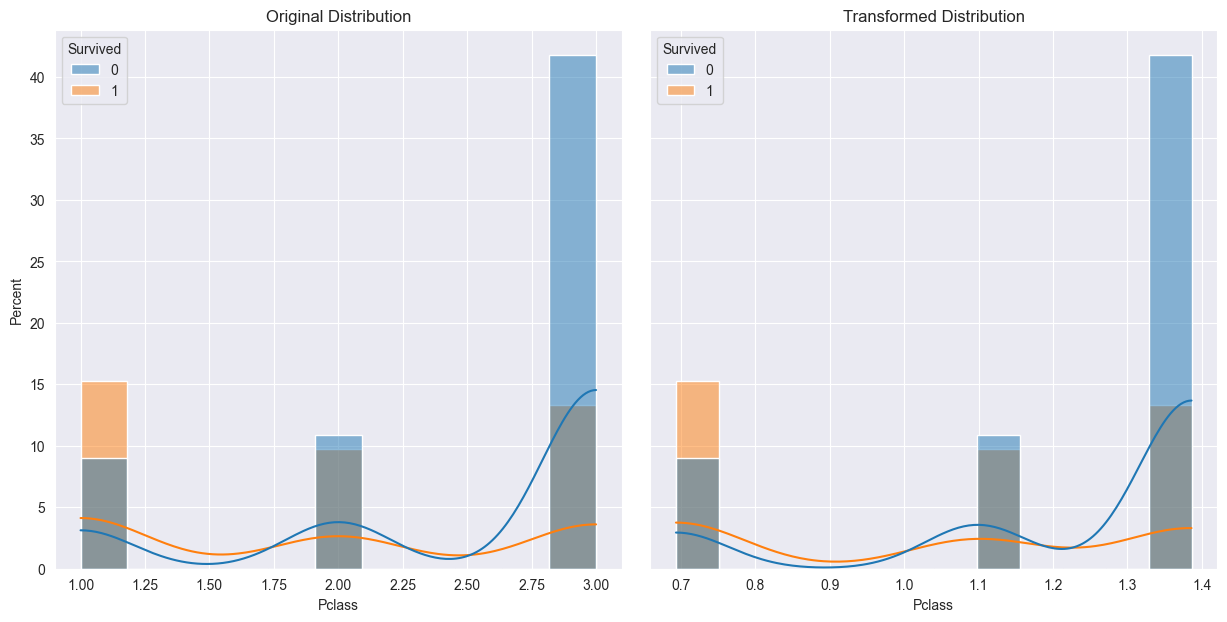

-------------------- Column: Sex --------------------
Transformation(s) Applied:
	Transformation:	No Transformation
	Reason:	Data does not contain any missing value.
	Transformation:	The two classes found are treated as binary and will be replaced by 0 and 1.
	Reason:	Inferred data types is 'object' and contains two unique values (binary class).
	Transformation:	Data is mirrored, shifted to be positive (+1) and then transformed appliying a logarithm.
	Reason:	Data has been found to be negatively skewed (skewness=-0.6179) and contains non-positive values.


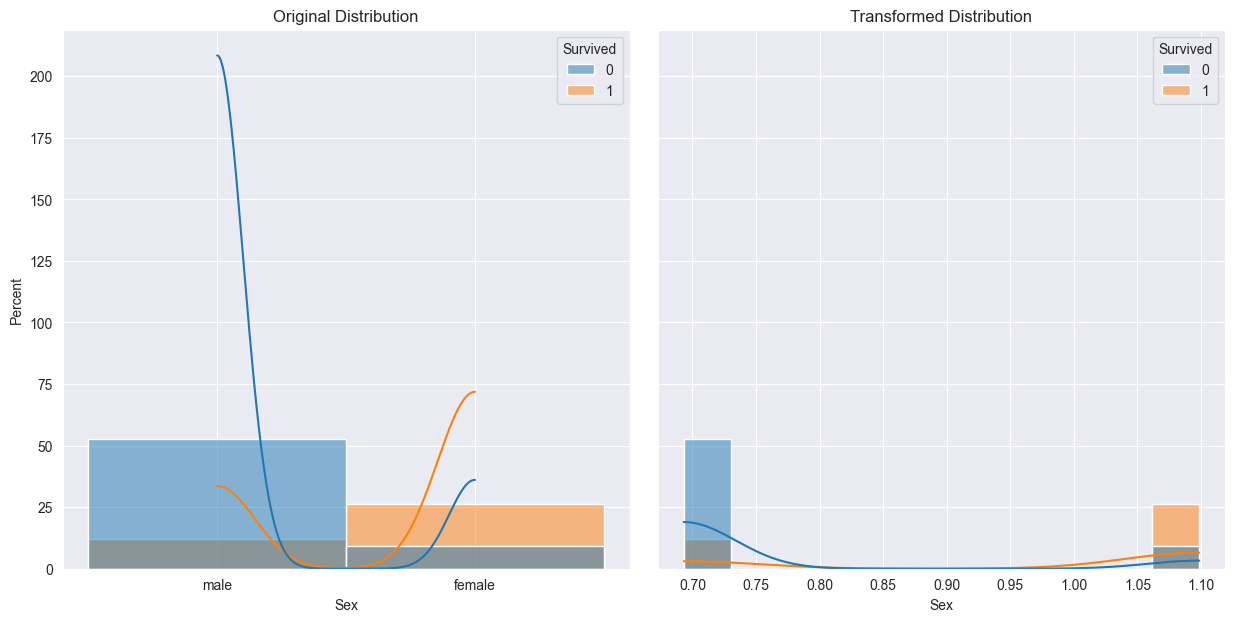

-------------------- Column: Age --------------------
Transformation(s) Applied:
	Transformation:	Empty values are filled with the 'mean'.
	Reason:	Inferred data types is 'numerical', the missing ratio (0.19865319865319866) is lower than the threshold given (0.2) and the data is not skewed (nan)
	Transformation:	Data is transformed to follow a uniform or a normal distribution spreading out the most frequent values.
	Reason:	Data has been found to many outliers (outliers=66) or to have heavy tails (kurto=0.9541).


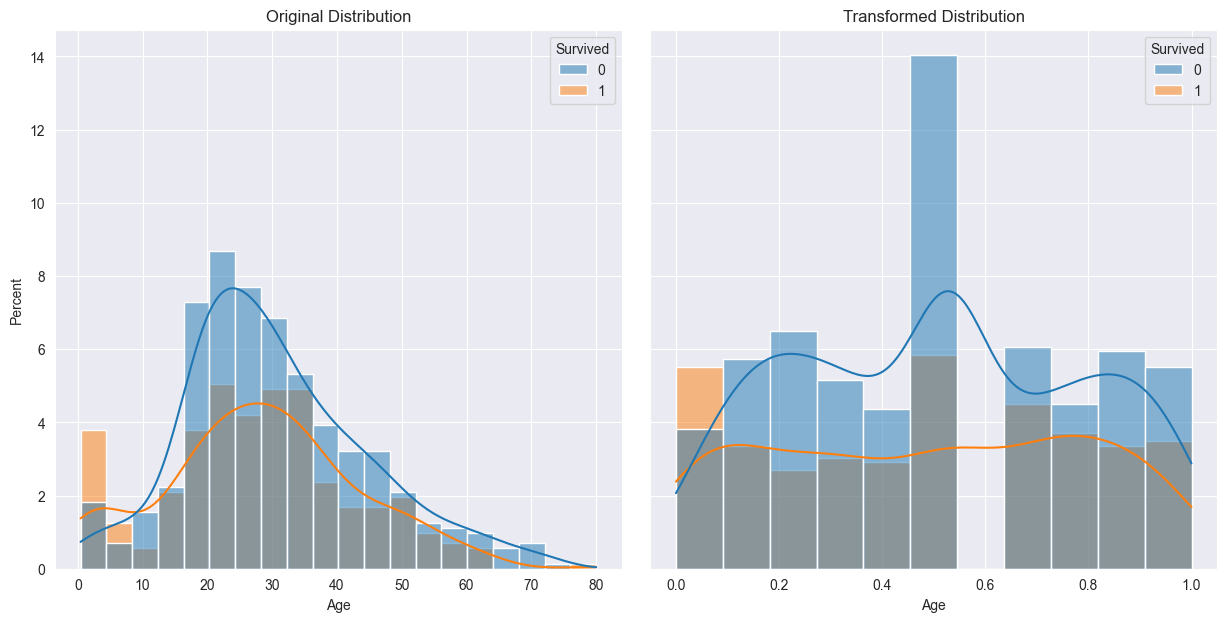

-------------------- Column: SibSp --------------------
Transformation(s) Applied:
	Transformation:	No Transformation
	Reason:	Data does not contain any missing value.
	Transformation:	Data is shifted to be positive (+1) and then transformed appliying a logarithm.
	Reason:	Data has been found to be positively skewed (skewness=3.6891) and contains non-positive values.


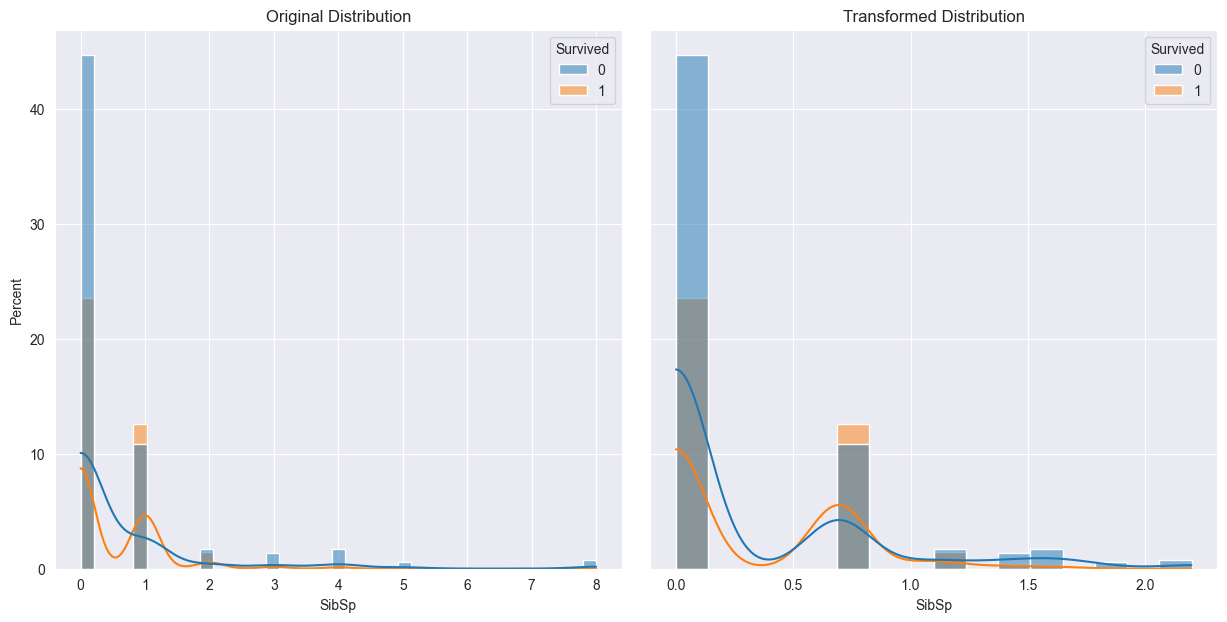

-------------------- Column: Parch --------------------
Transformation(s) Applied:
	Transformation:	No Transformation
	Reason:	Data does not contain any missing value.
	Transformation:	Data is shifted to be positive (+1) and then transformed appliying a logarithm.
	Reason:	Data has been found to be positively skewed (skewness=2.7445) and contains non-positive values.


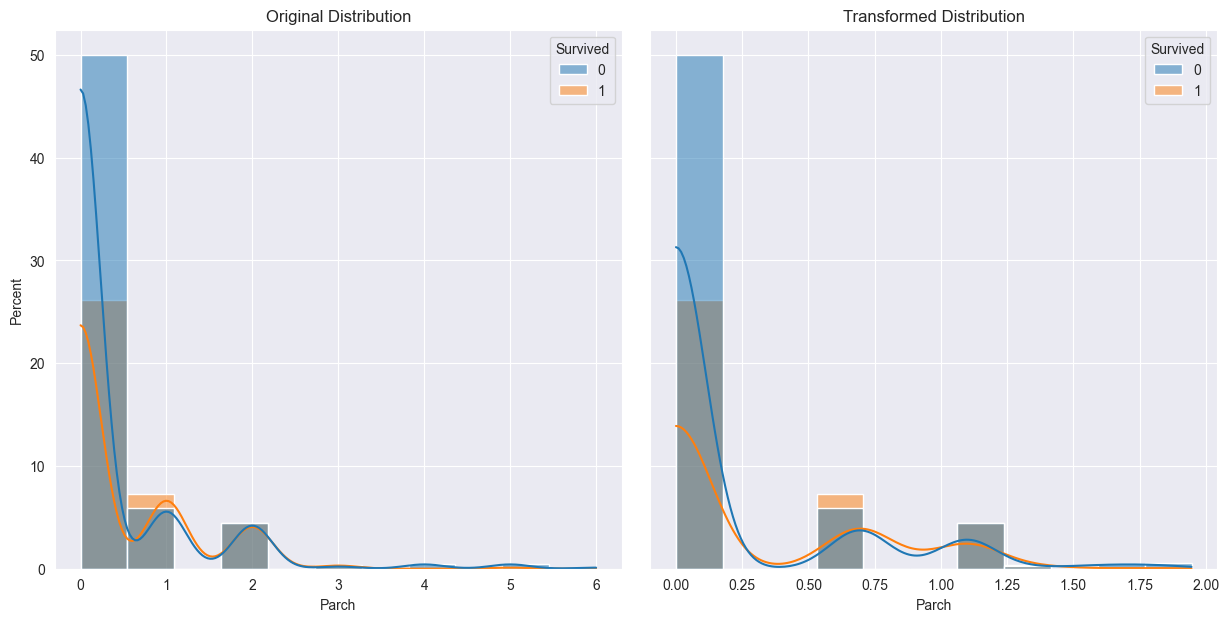

-------------------- Column: Fare --------------------
Transformation(s) Applied:
	Transformation:	No Transformation
	Reason:	Data does not contain any missing value.
	Transformation:	Data is shifted to be positive (+1) and then transformed appliying a logarithm.
	Reason:	Data has been found to be positively skewed (skewness=4.7793) and contains non-positive values.


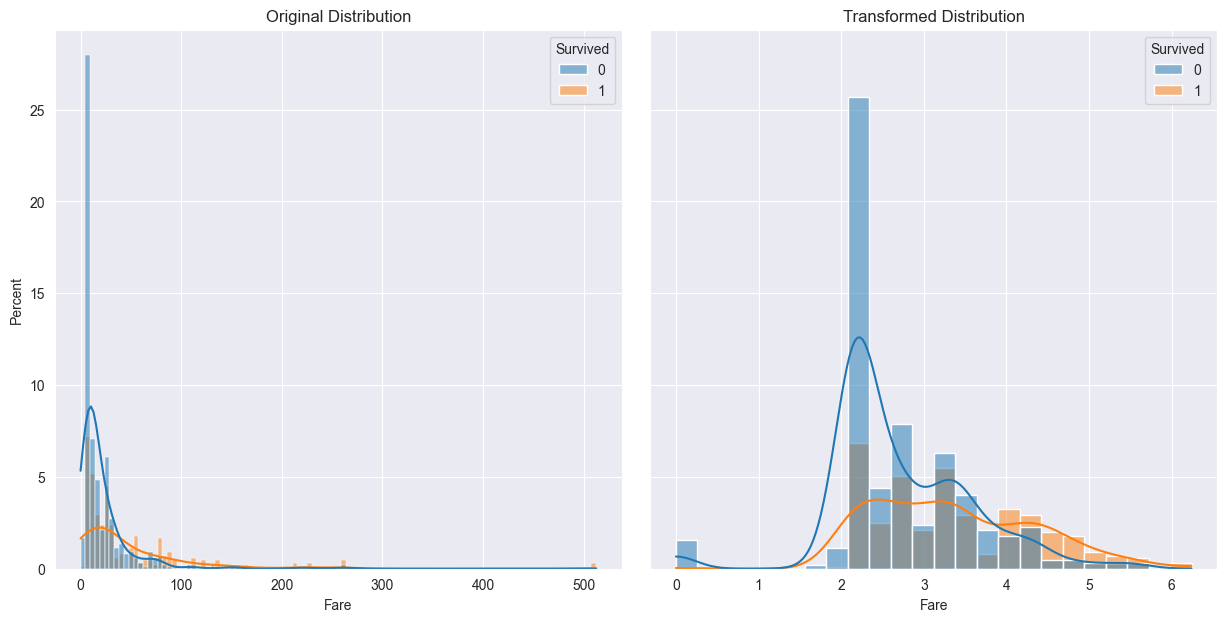

-------------------- Column: Survived --------------------


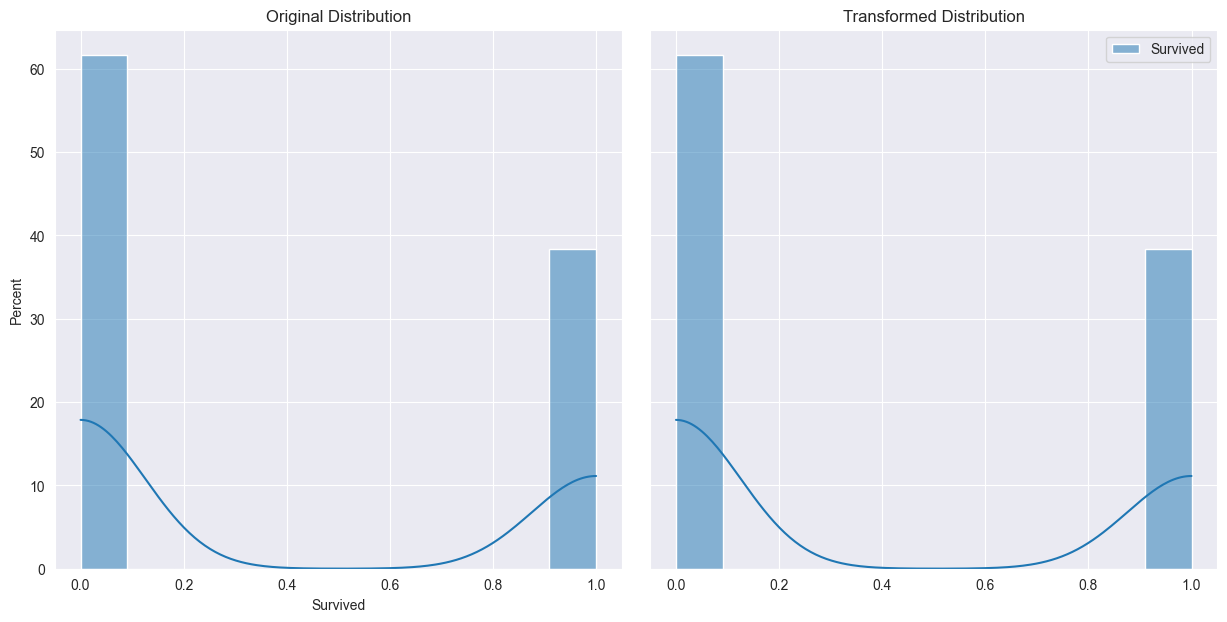

In [11]:
gen_processor.display_transformations()

In [12]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
mt = ModelTester(data, 'Fare', index_column=ID_COLUMN)
mt.train_models()
mt.linear_regression_score

c:\Desktop\programacion\python\git_proyects\MLIA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
c:\Desktop\programacion\python\git_proyects\MLIA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
c:\Desktop\programacion\python\git_proyects\MLIA\.venv\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:217: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
c:\Desktop\programacion\python\git_proyects\MLIA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
c:\Desktop\programacion\python\git_proyects\MLIA\.venv\Lib\sit

0.6366012061914238

In [14]:
adsad

NameError: name 'adsad' is not defined

# Models

In [ ]:
ar = pd.DataFrame([[1], [2], [3], [4], [5]], columns=['Col'])
ar.to_numpy().flatten()

array([1, 2, 3, 4, 5])

In [ ]:
#inplace = Hace la acción en el propio dataframe No hace falta sustituir
data_no_cabin.drop(columns=['Ticket','Name', 'PassengerId','Pclass','Embarked','SibSp','Parch'],axis=1,inplace=True)
data_no_cabin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   Fare      889 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 67.0+ KB


In [ ]:
# Revisar: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Enseñar datos al encoder
le.fit(data_no_cabin['Sex'])
#Transformar dataframe
data_no_cabin['Sex'] = le.transform(data_no_cabin['Sex'])

le_Embarked = LabelEncoder()

data_no_cabin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Sex       889 non-null    int32  
 2   Age       889 non-null    float64
 3   Fare      889 non-null    float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 63.5 KB


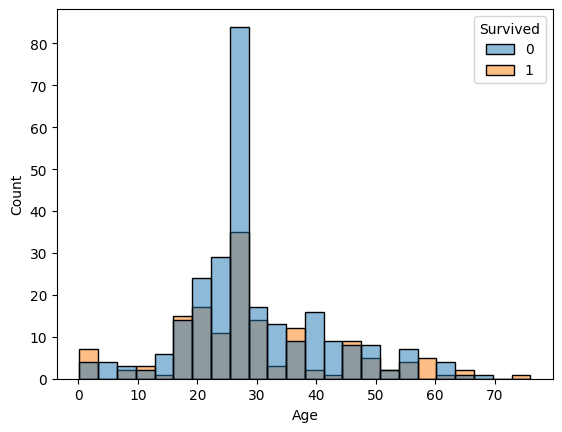

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data_no_cabin_test, x='Age', hue='Survived')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#verbose devuelve datos del entrenamiento
lr = LogisticRegression(verbose=2,n_jobs=-1)
X_train = data_no_cabin.drop(columns=['Survived'], axis=1)
Y_train = data_no_cabin['Survived']

# Entrenar el modelo con datos del propio train.csv con un 20% para validar el modelo 
# Stratify Mantiene las proporciones de los datos en los subconjuntos escogidos:
# [0,0,1,1,1] -> 40% = [0,0] SIN STRATIFY
# [0,0,1,1,1] -> 40% = [0,1] CON STRATIFY

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

lr.fit(X_train, Y_train)
th = 0.4
Y_pred = np.int32(lr.predict_proba(X_val)[:,1] >= th)
Y_pred

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1])

Accuracy of the model: 80.34% 
Precision of the model: 72.97% 
Recall of the model: 78.26% 
F1 of the model: 75.52%


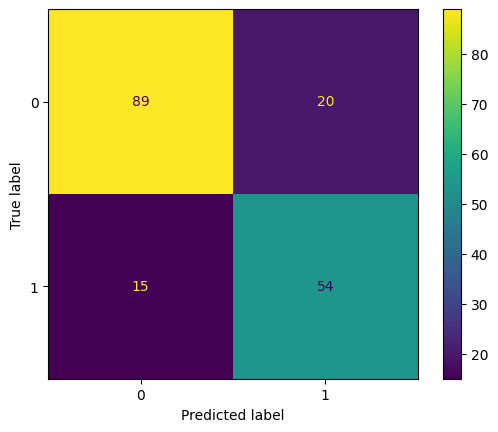

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve, RocCurveDisplay,auc

print(f"Accuracy of the model: {round(100*accuracy_score(Y_val,Y_pred),2)}% \nPrecision of the model: {round(100*precision_score(Y_val,Y_pred),2)}% \nRecall of the model: {round(100*recall_score(Y_val,Y_pred),2)}% \nF1 of the model: {round(100*f1_score(Y_val,Y_pred),2)}%")

cm = confusion_matrix(Y_val,Y_pred)
ConfusionMatrixDisplay(cm).plot()


In [ ]:
X_test = pd.read_csv('titanic\\test.csv')
Y_test = pd.read_csv('titanic\\gender_submission.csv')
data_no_cabin_test = X_test.merge(Y_test,on='PassengerId',how='left')
data_no_cabin_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
data_no_cabin_test = data_no_cabin_test.drop(columns=['PassengerId','Name','Ticket','Cabin','Pclass','Embarked','SibSp','Parch'])
data_no_cabin_test = data_no_cabin_test.drop(data_no_cabin_test[data_no_cabin_test['Fare'].isnull()].index)
data_no_cabin_test.loc[data_no_cabin_test['Age'].isnull(),'Age'] =  data_no_cabin_test[data_no_cabin_test['Age'].notnull()]['Age'].median()

data_no_cabin_test['Sex'] = le.transform(data_no_cabin_test['Sex'])

data_no_cabin_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       417 non-null    int32  
 1   Age       417 non-null    float64
 2   Fare      417 non-null    float64
 3   Survived  417 non-null    int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 14.7 KB


Accuracy of the model: 97.12% 
Precision of the model: 92.68% 
Recall of the model: 100.0% 
F1 of the model: 96.2%


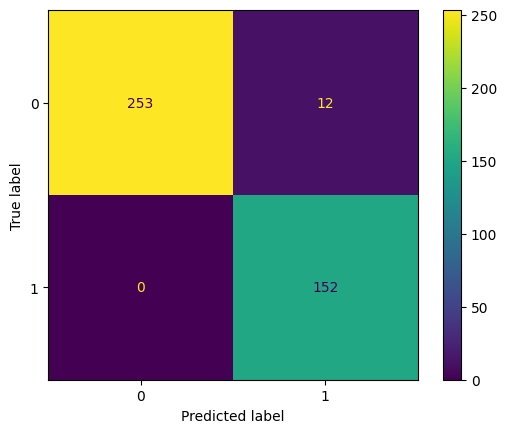

In [ ]:
X_test = data_no_cabin_test.drop(columns=['Survived'], axis=1)
Y_test = data_no_cabin_test['Survived']

th = 0.4
Y_pred = np.int32(lr.predict_proba(X_test)[:,1] >= th)

print(f"Accuracy of the model: {round(100*accuracy_score(Y_test,Y_pred),2)}% \nPrecision of the model: {round(100*precision_score(Y_test,Y_pred),2)}% \nRecall of the model: {round(100*recall_score(Y_test,Y_pred),2)}% \nF1 of the model: {round(100*f1_score(Y_test,Y_pred),2)}%")

cm = confusion_matrix(Y_test,Y_pred)
ConfusionMatrixDisplay(cm).plot()

[2 1 0]
AUC: 0.9773584905660377


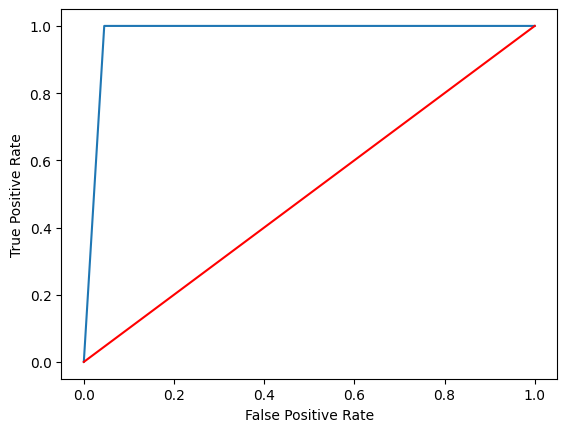

In [ ]:

fpr, tpr, thresh = roc_curve(Y_test,Y_pred)
print(thresh)
RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.plot([0,1],[0,1], color="red")
print(f'AUC: {auc(fpr,tpr)}')

# TREE

In [ ]:
#MODELO TREE
#Ventajas:
# - Entreno rapido
# - Bueno para datasets muy pequeños (- 500)
# - Muy flexibles
#Desventajas:
# - Propenso a OVERFITING
# - Malo con datasets pequeños (1000+)
# - Necesario pruning (PODAR) [LIMITAR]

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
X_train = data_no_cabin.drop(columns=['Survived'], axis=1)
Y_train = data_no_cabin['Survived']


X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

dtc.fit(X_train, Y_train)
th = 0.4
Y_pred = np.int32(dtc.predict_proba(X_val)[:,1] >= th)
Y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1])

Accuracy of the model: 80.9% 
Precision of the model: 73.33% 
Recall of the model: 79.71% 
F1 of the model: 76.39%


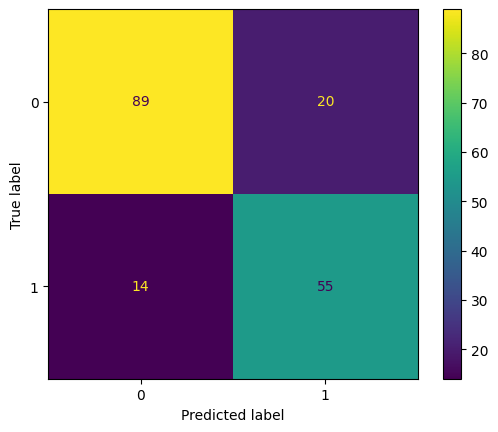

In [ ]:
print(f"Accuracy of the model: {round(100*accuracy_score(Y_val,Y_pred),2)}% \nPrecision of the model: {round(100*precision_score(Y_val,Y_pred),2)}% \nRecall of the model: {round(100*recall_score(Y_val,Y_pred),2)}% \nF1 of the model: {round(100*f1_score(Y_val,Y_pred),2)}%")

cm = confusion_matrix(Y_val,Y_pred)
ConfusionMatrixDisplay(cm).plot()

Accuracy of the model: 97.6% 
Precision of the model: 93.83% 
Recall of the model: 100.0% 
F1 of the model: 96.82%


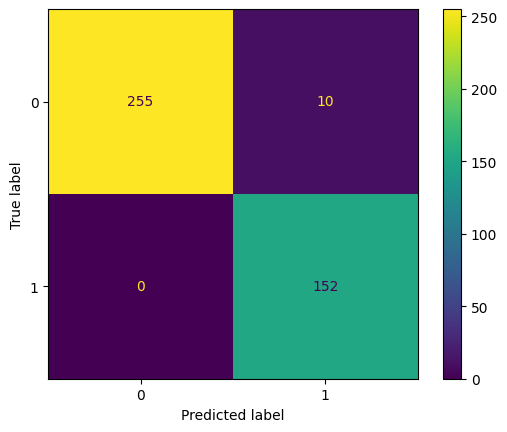

In [ ]:
X_test = data_no_cabin_test.drop(columns=['Survived'], axis=1)
Y_test = data_no_cabin_test['Survived']

th = 0.4
Y_pred = np.int32(dtc.predict_proba(X_test)[:,1] >= th)

print(f"Accuracy of the model: {round(100*accuracy_score(Y_test,Y_pred),2)}% \nPrecision of the model: {round(100*precision_score(Y_test,Y_pred),2)}% \nRecall of the model: {round(100*recall_score(Y_test,Y_pred),2)}% \nF1 of the model: {round(100*f1_score(Y_test,Y_pred),2)}%")

cm = confusion_matrix(Y_test,Y_pred)
ConfusionMatrixDisplay(cm).plot()

# Random Forest

In [ ]:
#MODELO RANDOM FOREST
#Ventajas:
# - Entreno mediano 
# - Bueno para cualquier dataset (+500)
# - Muy flexibles
#Desventajas:
# - Necesario pruning (PODAR) [LIMITAR]

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3)
X_train = data_no_cabin.drop(columns=['Survived'], axis=1)
Y_train = data_no_cabin['Survived']


X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

rfc.fit(X_train, Y_train)
th = 0.4
Y_pred = np.int32(rfc.predict_proba(X_val)[:,1] >= th)
Y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1])

Accuracy of the model: 81.46% 
Precision of the model: 72.5% 
Recall of the model: 84.06% 
F1 of the model: 77.85%


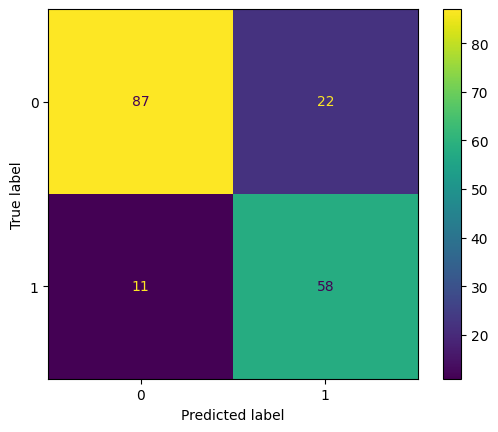

In [ ]:
print(f"Accuracy of the model: {round(100*accuracy_score(Y_val,Y_pred),2)}% \nPrecision of the model: {round(100*precision_score(Y_val,Y_pred),2)}% \nRecall of the model: {round(100*recall_score(Y_val,Y_pred),2)}% \nF1 of the model: {round(100*f1_score(Y_val,Y_pred),2)}%")

cm = confusion_matrix(Y_val,Y_pred)
ConfusionMatrixDisplay(cm).plot()

Accuracy of the model: 93.76% 
Precision of the model: 85.39% 
Recall of the model: 100.0% 
F1 of the model: 92.12%


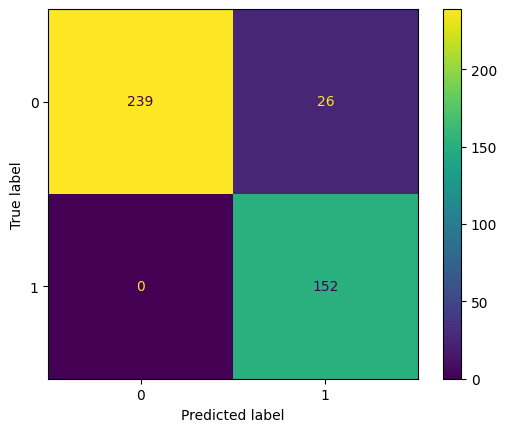

In [ ]:
X_test = data_no_cabin_test.drop(columns=['Survived'], axis=1)
Y_test = data_no_cabin_test['Survived']

th = 0.4
Y_pred = np.int32(rfc.predict_proba(X_test)[:,1] >= th)

print(f"Accuracy of the model: {round(100*accuracy_score(Y_test,Y_pred),2)}% \nPrecision of the model: {round(100*precision_score(Y_test,Y_pred),2)}% \nRecall of the model: {round(100*recall_score(Y_test,Y_pred),2)}% \nF1 of the model: {round(100*f1_score(Y_test,Y_pred),2)}%")

cm = confusion_matrix(Y_test,Y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
for im,col in zip(rfc.feature_importances_, X_train.columns):
    print(f'Columna: {col} | Importants: {round(im*100,2)}%',end='\n')

Columna: Sex | Importants: 51.81%
Columna: Age | Importants: 15.29%
Columna: Fare | Importants: 32.91%


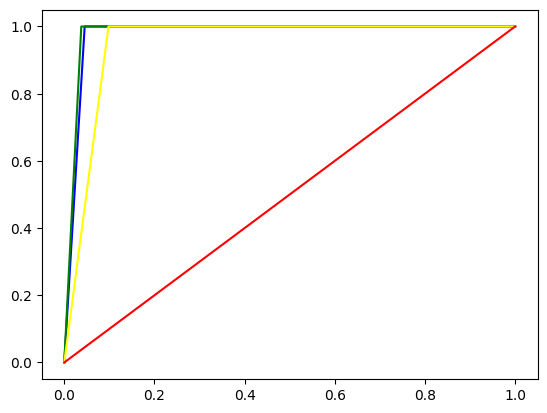

In [ ]:
Y_pred = np.int32(lr.predict_proba(X_test)[:,1] >= th)
fpr1, tpr1, thresh = roc_curve(Y_test,Y_pred)

Y_pred = np.int32(dtc.predict_proba(X_test)[:,1] >= th)
fpr2, tpr2, thresh = roc_curve(Y_test,Y_pred)

Y_pred = np.int32(rfc.predict_proba(X_test)[:,1] >= th)
fpr3, tpr3, thresh = roc_curve(Y_test,Y_pred)

# RocCurveDisplay(fpr=[fpr1,fpr2,fpr3],tpr=[tpr1,tpr2,tpr3]).plot()


plt.plot(fpr1,tpr1, color="blue")
plt.plot(fpr2,tpr2, color="green")
plt.plot(fpr3,tpr3, color="Yellow")
plt.plot([0,1],[0,1], color="red")


# Kmeans

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


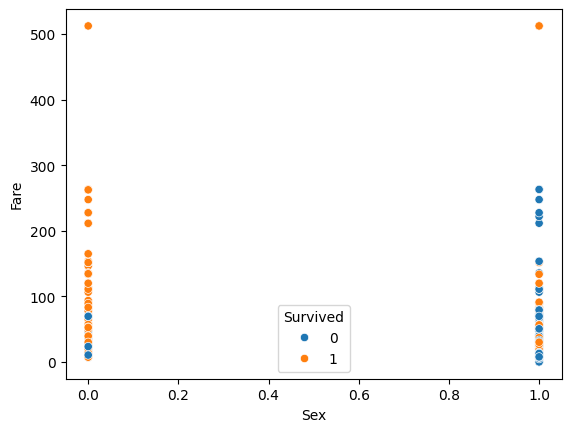

In [ ]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=2)
X_train = data_no_cabin.drop(columns=['Survived'], axis=1)
Y_train = data_no_cabin['Survived']

km.fit(X_train)
kmData = data_no_cabin.copy()
kmData['cluster'] = km.labels_
sns.scatterplot(data=kmData, x='Sex', y='Fare', hue='Survived')
plt.show()

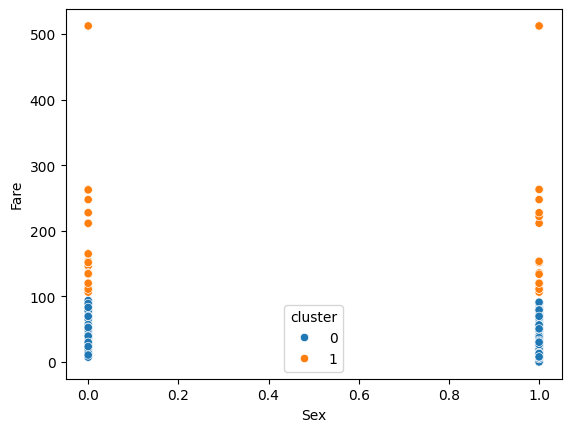

In [ ]:
sns.scatterplot(data=kmData, x='Sex', y='Fare', hue='cluster')
plt.show()
# sns.scatterplot(data=kmData, x='Sex', y='Age', hue='cluster')
# plt.show()
# sns.histplot(data=kmData, x='Age', hue='cluster')
# plt.show()

# DBSCAN


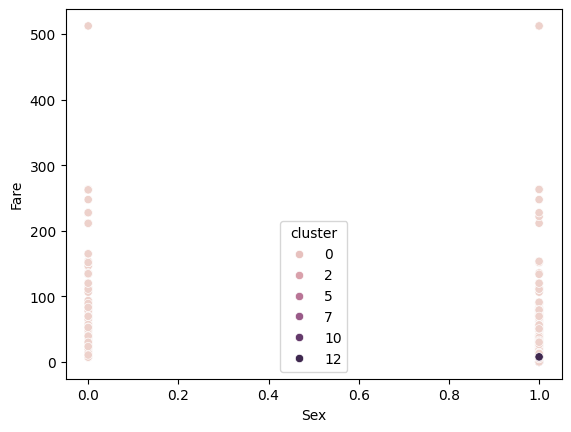

In [ ]:

from sklearn.cluster import DBSCAN

db = DBSCAN()

X_train = data_no_cabin.drop(columns=['Survived'], axis=1)
Y_train = data_no_cabin['Survived']

db.fit(X_train)
dbData = data_no_cabin.copy()
dbData['cluster'] = db.labels_
sns.scatterplot(data=dbData, x='Sex', y='Fare', hue='cluster')
plt.show()

C:\Users\marti\AppData\Local\Temp\ipykernel_13360\2538047535.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(dbData['Age'], dbData['Fare'], dbData['Sex'], cmap='viridis')


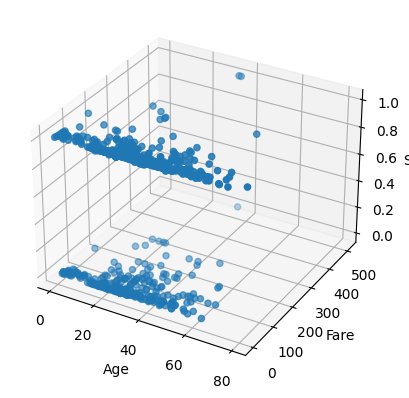

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dbData['Age'], dbData['Fare'], dbData['Sex'], cmap='viridis')

# Set the labels
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Sex')

# Show the plot
plt.show()


In [ ]:
data_train = pd.read_csv('titanic\\train.csv')

X_test = pd.read_csv('titanic\\test.csv')
Y_test = pd.read_csv('titanic\\gender_submission.csv')
data_test = X_test.merge(Y_test,on='PassengerId',how='left')



data_test = data_test.drop(columns=['PassengerId','Name','Ticket','Cabin'])
data_test = data_test.drop(data_test[data_test['Fare'].isnull()].index)
data_test.loc[data_test['Age'].isnull(),'Age'] =  data_test[data_test['Age'].notnull()]['Age'].median()

le_Embarked = LabelEncoder()
#Transformar dataframe
data_test['Embarked'] = le_Embarked.fit_transform(data_test['Embarked'])

data_test['Sex'] = le.transform(data_test['Sex'])

data_train = data_train.drop(columns=['PassengerId','Name','Ticket','Cabin'])

data_train = data_train.drop(data_train[data_train['Fare'].isnull()].index)
data_train = data_train.drop(data_train[data_train['Embarked'].isnull()].index)

data_train['Embarked'] = le_Embarked.transform(data_train['Embarked'])

data_train.loc[data_train['Age'].isnull(),'Age'] =  data_train[data_train['Age'].notnull()]['Age'].median()

data_train['Sex'] = le.transform(data_train['Sex'])

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.6 KB


# LinearRegression 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

lreg = LinearRegression()

X_train = data_train.drop(columns='Fare',axis=1)
Y_train = data_train['Fare']

X_test = data_test.drop(columns='Fare',axis=1)
X_test = X_test[X_train.columns]
Y_test = data_test['Fare']

lreg.fit(X_train,Y_train)

Y_pred = lreg.predict(X_test)
Y_pred
#Calculo del error promedio
# if original = X
# predict = X +- 2 
print(f'MAE mean: {round(mae(Y_test, Y_pred)/len(X_test),2)}')

#Igual pero penaliza más los extremos
print(f'MSE mean: {round(np.sqrt(mse(Y_test, Y_pred)/len(X_test)),2)}')


MSE mean: 2.09
MAE mean: 0.06
